# 02805 Social graphs and interactions, Fall 20205 - Assignment 1

In [ ]:
#import all necessary libraries and modules
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import pickle, requests, os, re

## Assignment 1.1: Exploring WS and BA models

#### $\textbf{Did you really read the text?}$

##### Question: What's the problem with random networks as a model for real-world networks according to the argument in section 3.5?

Answer: In random networks the different nodes does not have a very large difference in the number of links to other nodes. This is in contrast to real world phenomena, where (in the social network for instance) we have some outliers who know many thousands of people, and some who do not know almost any. We are missing the big Hubs which connect a lot of people. This can be seen in chapter 3.5 Image 3.6, where the actual degree distribution of a real network, does not at all reflect the idealized version of the random network.

##### Question: List the four regimes that characterize random networks as a function of $<k>$.

Answer: The four regimes that characterize random networks are: 
1) Subcritical Regime | Here the average degree of a node <k> < 1. This results in a network consisting of many tiny clusters. That is, a highly disconnected network of nodes. The largest cluster in this domain is roughly of size ln N
2) Critical point | Here we have <k> = 1. This lead s to a significant jump in the size of the largest cluster in the network. We still don't have a giant component, however the largest cluster is rougly of size N^(2/3).
3) Supercritical Regime | Here we have <k> > 1. In this regime we start to have giant component. The size of the largest component is roughly (p-1/N)N. In this regime we will have multiple connected components coexisting with the giant component.
4) Connected Regime | Here we have <k> > ln N. In this regime the giant component absorbs all other nodes, leaving (almost) no isolated nodes.

##### Question: According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

Answer: Because in the random network we expect the culstering coefficient to decrease as N grows. This is in contrast to real networks where this decreases as a function of k. This means that the clustering coefficient in real networks are more or less independent of the size of the network size.

#### $\textbf{WS Edition}$

##### Question: First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p=0, 0.1,$ and $1$. Calculate the average shortest path length $<d>$ for each one.

In [37]:
# Answer:
### Insert code here

##### Question: Describe what happens to the network when $p=1$.

Answer:

##### Question: Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p=0$. What's the value of $p$ for which the average shortest path length get close to the short paths we find in a fully randomized network.

In [38]:
# Answer:
### Insert code here

##### Question: Let's investigate this behavior in detail. Generate 50 networks with $N = 500, <k> = 4$, for each of $p \in \left\{ 0, 0.01, 0.03, 0.05, 0.1, 0.2\right\}$. Calculate the average of $<d>$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [39]:
# Answer:
### Insert code here

##### Question: Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

Answer:

#### $\textbf{BA Edition}$

##### Question: What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

Answer:

##### Question: What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

Answer:

##### Question: First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).

In [40]:
# Answer:
### Insert code here

##### Question: Now add another node, connecting one of the existing nodes in proportion to their degree.

In [41]:
# Answer:
### Insert code here

##### Question: Keep going until you have a 100 node network.
Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.

In [42]:
# Answer:
### Insert code here

##### Question: Plot the network.

In [43]:
# Answer:
### Insert code here

##### Question: Add more nodes until you have a 5000 node network.

In [44]:
# Answer:
### Insert code here

##### Question: What's the maximum and minimum degree?

In [45]:
# Answer:
### Insert code here

##### Question: Now, bin the degree distribution using numpy.histogram.,

In [46]:
# Answer:
### Insert code here

##### Question: Plot the distribution. Plot it with both linear and log-log axes.

In [47]:
# Answer:
### Insert code here

#### $\textbf{Explain your process in words}$

##### Question: Document how you crawled the network.
Answer:

$\textbf{Steps taken}$: We reused our code for downloading wikipedia pages from week 1. We used this code to download all of the text on the $\textit{List of mainstream rock performers}$ wikipediea-page (https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers). We then used a regular expression in order to extract all the links on the wikipedia page. We then cleaned the titles of the links by replacing blank spaces with underscores, such that these could now be used in our wikipedia-page downloader function. We removed the very first link,. as this linked to $\textit{rock music}$ (https://en.wikipedia.org/wiki/Rock_music), which we didn't want in our data set. Some of the links we found were on the format 'title1 | title2'. We handled this by taking title1, as we found that this was the one linking to the musician. Now we had a comprehensive list of rock performers, which we iterated over, downloading all the text of their wikipedia page. We saved all of this data in a .pkl file in a list of dictionaries on the form {'page_name' : 'The_Rolling_Stones', 'text': '...'}.


$\textbf{Most difficult part of the process}$: The most difficult/annoying part of the process was to handle the special characters. These gave a headache at first, when trying to solve it manually. However, with the help of LLMs we managed to get through it.


$\textbf{How we used LLMs for help}$: We used ChatGPT for help of the regular expressions to be used to extract all the links from the wiki text. That is, ChatGPT helped us get the search pattern: r'\[\[([^\]]+)\]\]', which extracts everything in between two closed brackets ( [[Text here is extracted]] ). We also got help from ChatGPT to handle the special characters such as '-', 'Ü', etc. as there were some problems with the encoding when interacting with the wikipedia api.


$\textbf{How would we do it differently in the future}$:

#### $\textbf{Simple network statistics and analysis}$

In [48]:
# Download the data from github if not already downloaded
filename = "assignment_1_rock_bands.pkl"

url = "https://raw.githubusercontent.com/sorenstange/02805_Social_graphs_and_interactions/main/assignment_1_rock_bands.pkl"

# Step 1: Check if file exists
if not os.path.exists(filename):
    # Download the file if it does not exist
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print("File downloaded successfully.")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")
else:
    print("File already exists. Skipping download.")

# Step 2: Load the .pickle file
with open(filename, "rb") as f:
    data = pickle.load(f)

File already exists. Skipping download.


In [96]:
# Declare helper functions
def clean_links(links):
    arr = []
    for l in links:
        match = re.search(r'|', l)
        if match:
            splits = l.split(r'|')
            arr.append(splits[0].replace(' ', '_'))
        else:
            arr.append(l.replace(' ', '_'))
    return arr

def analyze_node(data_point):
    Node = data_point['page_name']
    text = data_point['content']
    words = len(text.split())
    links_to = re.findall(r'\[\[([^\]]+)\]\]', text)
    links_to = clean_links(links_to)
    return Node, links_to, words

def create_network(data):
    G = nx.DiGraph()
    Nodes = list(set([data_point['page_name'] for data_point in data]))
    Nodes.remove('AllMusic')
    for data_point in data:
        Node, links_to, words = analyze_node(data_point)
        if Node == 'AllMusic':
            continue
        G.add_node(Node, words=words)
        for links_to_node in links_to:
            if links_to_node in Nodes:
                G.add_edge(Node, links_to_node)
    
    # Extract the largest component
    components = nx.weakly_connected_components(G)
    largest = max(components, key=len)
    G = G.subgraph(largest).copy()
    return G

    
def compare_degree_distributions(G, bins=30):
    plt.style.use("seaborn-v0_8-whitegrid")
    plt.rcParams.update({
        "font.size": 12,
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
        "figure.titlesize": 16
    })
    
    # Original network stats
    n = G.number_of_nodes()
    m = G.number_of_edges()

    # Generate random directed graph
    G_random = nx.gnm_random_graph(n, m, directed=True)

    # Generate scale-free directed graph
    G_sf = nx.scale_free_graph(n)
    #G_sf = nx.DiGraph(G_sf)  # remove parallel edges/self-loops

    # Degree sequences
    in_deg_original = [deg for _, deg in G.in_degree()]
    out_deg_original = [deg for _, deg in G.out_degree()]
    out_deg_random = [deg for _, deg in G_random.degree()]
    in_deg_sf = [deg for _, deg in G_sf.degree()]

    # Define shared bin edges
    in_max = max(max(in_deg_original), max(in_deg_sf))
    out_max = max(max(out_deg_original), max(out_deg_random))

    in_bins = np.linspace(0, in_max, bins+1)
    out_bins = np.linspace(0, out_max, bins+1)

    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # In-degree plots (shared bins)
    axes[0,0].hist(in_deg_original, bins=in_bins, color="#1f77b4", alpha=0.8, edgecolor="black")
    axes[0,0].set_title("Original In-degree distribution")

    axes[1,0].hist(in_deg_sf, bins=in_bins, color="purple", alpha=0.8, edgecolor="black")
    axes[1,0].set_title("Scale-free degree distribution")

    # Out-degree plots (shared bins)
    axes[0,1].hist(out_deg_original, bins=out_bins, color="#ff7f0e", alpha=0.8, edgecolor="black")
    axes[0,1].set_title("Original Out-degree distribution")
    axes[1,1].hist(out_deg_random, bins=out_bins, color="green", alpha=0.8, edgecolor="black")
    axes[1,1].set_title("Random Graph degree distribution")

    for ax in axes.flat:
        ax.set_xlabel("Degree")
        ax.set_ylabel("Frequency")

    fig.suptitle("Degree Distribution Comparison", fontsize=16, weight="bold")
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


G = create_network(data)

##### Question: What is the number of nodes in the network?

In [ ]:
# Answer:
print(f'Answer: There are {len(G.nodes())} nodes in the network.\n')

A: There are 484 nodes in the network.



##### Question: What is the number of links in the network?

In [ ]:
# Answer:
print(f'Answer: There are {len(G.edges())} links in the network.\n')

A: There are 7321 links in the network.



##### Question: Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?

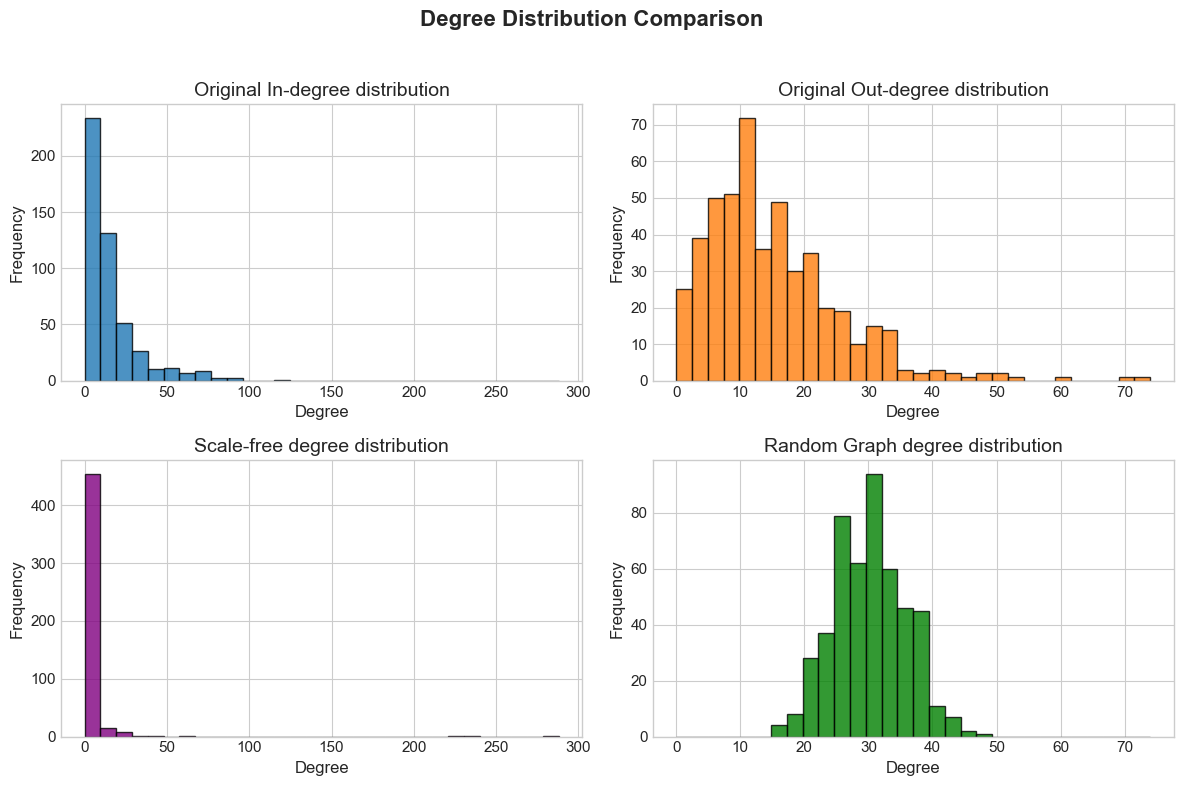

In [52]:
# Answer:
compare_degree_distributions(G, bins = 30)

Figure X: Insert figure text here.

Question: Compare the out-degree distribution to a random network with the same number of nodes and links.

Question: Compare the in-degree distribution to a scale-free network with the same number of nodes.

##### Question: Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)?

In [53]:
sorted_nodes = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
top5_in = sorted_nodes[:5]

sorted_nodes = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)
top5_out = sorted_nodes[:5]

print("\033[1mTop 5 most connected performers (In-degree):\033[0m")
print(f'{"Performer":<40} {"In-degree":>10}')
print('-' * 52)
for performer, degree in top5_in:
    print(f'{performer:<40} {degree:>10}')

print("\n\033[1mTop 5 most connected performers (Out-degree):\033[0m")
print(f'{"Performer":<40} {"Out-degree":>10}')
print('-' * 52)
for performer, degree in top5_out:
    print(f'{performer:<40} {degree:>10}')


Top 5 most connected performers (In-degree):
Performer                                 In-degree
----------------------------------------------------
Led_Zeppelin                                    119
Bob_Dylan                                        95
Queen_(band)                                     88
Metallica                                        85
David_Bowie                                      83

Top 5 most connected performers (Out-degree):
Performer                                Out-degree
----------------------------------------------------
Alice_in_Chains                                  74
Deep_Purple                                      71
Black_Sabbath                                    60
Def_Leppard                                      52
Bryan_Adams                                      51


##### Comment on your findings. Is this what you would have expected?
Insert comment here

##### Question: What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?

In [54]:
# Answer:
nodes_with_words = [(node, data['words']) for node, data in G.nodes(data=True)]
top10 = sorted(nodes_with_words, key=lambda x: x[1], reverse=True)[:10]
print("\n\033[1mTop 10 pages with longest wiki entries:\033[0m")
print(f'{"Performer":<40} {"Words":>10}')
print('-' * 52)
for performer, words in top10:
    print(f'{performer:<40} {words:>10}')


Top 10 pages with longest wiki entries:
Performer                                     Words
----------------------------------------------------
Bob_Dylan                                     30647
Guns_N'_Roses                                 29710
Paul_McCartney                                27330
Queen_(band)                                  27170
The_Rolling_Stones                            26186
David_Bowie                                   24912
Elton_John                                    24904
U2                                            24877
The_Beach_Boys                                24816
Elvis_Presley                                 24710


#### Let's build a simple visualization of the network

1. For the sake of the visualisation, let's convert our network to undirected graph (tip: There is a NetworkX command to help you).
- Note: Keep the directed graph, we will use it in the following exercises.
2. Use the NetworkX command nx.spring_layout or nx.draw_kamada_kawai to draw the resulting undirected network. (You can find background on the algorithms here.)
- Set up your plot so that node-size depends on the node degree.
- Make the node color depend on the length of content attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

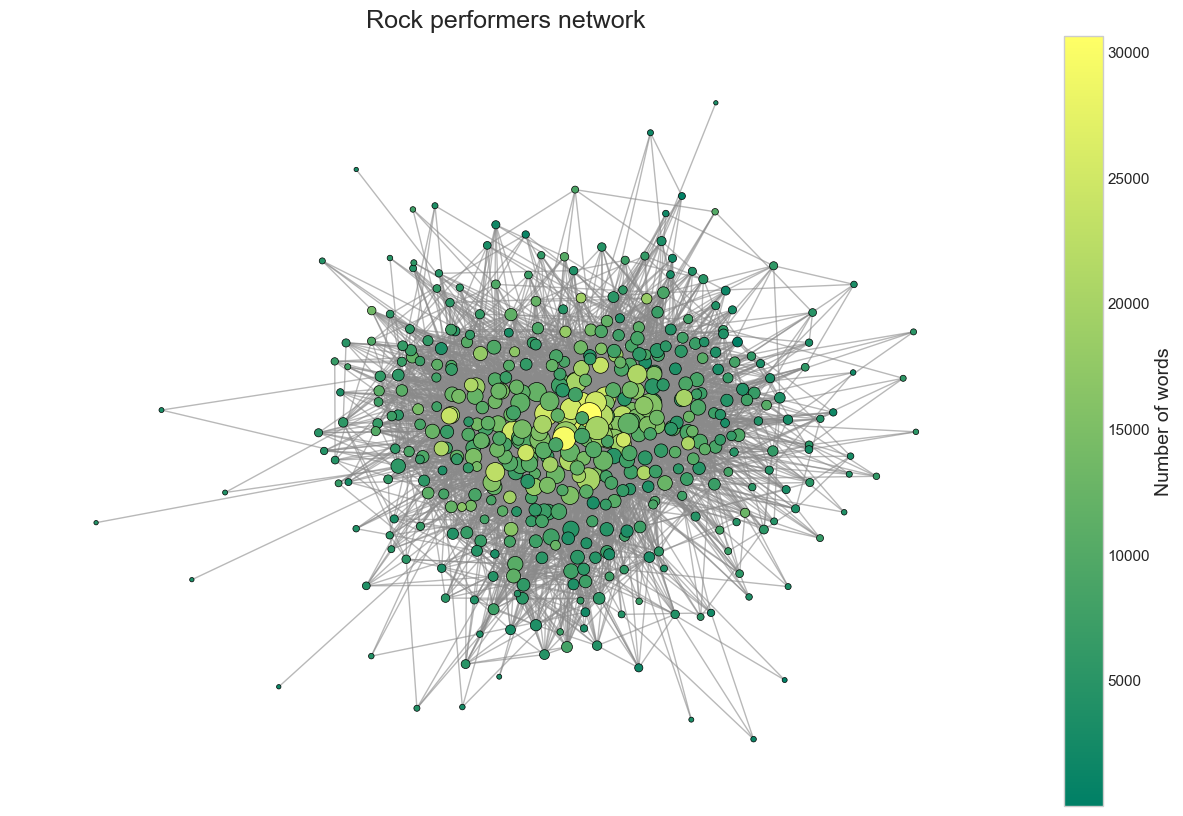

In [95]:
# Answer:
### Insert code here
G_undirected = G.to_undirected().copy()

pos = nx.spring_layout(G_undirected)

words = [data['words'] for _, data in G_undirected.nodes(data=True)]
norm = plt.Normalize(vmin=min(words), vmax=max(words))
cmap = plt.cm.summer
colors = cmap(norm(words))

degrees = np.array([deg for _, deg in G_undirected.degree()])
max_node_size, min_node_size = 400, 10
normalized_degrees = (degrees-np.min(degrees))/(np.max(degrees)-np.min(degrees))
node_sizes = min_node_size + normalized_degrees * (max_node_size - min_node_size)

fig, ax = plt.subplots(figsize=(16,10))
nx.draw_networkx_nodes(G_undirected, pos, ax=ax,
                               node_size=node_sizes,
                               node_color=colors,
                               edgecolors="black", linewidths=0.5)
nx.draw_networkx_edges(G_undirected, pos, ax=ax,
                               edge_color="#8A8A8A",
                               alpha=0.6, width=1)
ax.set_title('Rock performers network', fontsize=18)
ax.axis("off")

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Number of words", fontsize=14)

plt.show()

Figure X: Insert figure text here

##### THE END